# Text Cleaning 

In [2]:
import pandas as pd

# read JSON
df = pd.read_json('waitrose.json')

# Reserve relevant element
df = df[['id', 'text', 'truncated', 'extended_tweet']]

# read the result
print(df.head())

# save
df.to_csv('text.csv', index=False)

                    id                                               text  \
0  1288421250000000000  RT @HelpThemHelpUs_: Our friends at @Potsandco...   
1  1328737494000000000  @HOOODINIIII @roh17h @Samuel51 @sainsburys @Ma...   
2  1233486785000000000  @waitrose the wine you delivered yesterday was...   
3  1327179666000000256  RT @jlandpartners: This Christmas we want to #...   
4  1268647218000000000  RT @RebeccaTillett1: @waitrose if the U.K. ach...   

   truncated extended_tweet  
0      False           None  
1      False           None  
2      False           None  
3      False           None  
4      False           None  


In [3]:
import ast

# Modify the function to handle both truncated and extended tweet extraction
def extract_full_text(row):
    if row['truncated'] == False:
        return row['text']
    else:
        try:
            data_dict = ast.literal_eval(row['extended_tweet'])
            return data_dict.get('full_text', None)
        except:
            return None

# Apply this function to each row considering the truncated value.
df['full_text'] = df.apply(lambda row: extract_full_text(row), axis=1)

# Display the first few lines of the updated DataFrame to ensure that full_text is extracted correctly.
df[['id', 'text', 'truncated', 'extended_tweet', 'full_text']].head(10)

,id,text,truncated,extended_tweet,full_text
0,1288421250000000000,RT @HelpThemHelpUs_: Our friends at @Potsandco...,False,None,RT @HelpThemHelpUs_: Our friends at @Potsandco...
1,1328737494000000000,@HOOODINIIII @roh17h @Samuel51 @sainsburys @Ma...,False,None,@HOOODINIIII @roh17h @Samuel51 @sainsburys @Ma...
2,1233486785000000000,@waitrose the wine you delivered yesterday was...,False,None,@waitrose the wine you delivered yesterday was...
3,1327179666000000256,RT @jlandpartners: This Christmas we want to #...,False,None,RT @jlandpartners: This Christmas we want to #...
4,1268647218000000000,RT @RebeccaTillett1: @waitrose if the U.K. ach...,False,None,RT @RebeccaTillett1: @waitrose if the U.K. ach...
5,1244588187000000000,@Peterkay2k11 @Morrisons @Tesco @sainsburys @a...,True,{'full_text': '@Peterkay2k11 @Morrisons @Tesco...,@Peterkay2k11 @Morrisons @Tesco @sainsburys @a...
6,1319360588000000000,@DrJDrooghaag @GeekOnTheLoose @digitalcloudgal...,True,{'full_text': '@DrJDrooghaag @GeekOnTheLoose @...,@DrJDrooghaag @GeekOnTheLoose @digitalcloudgal...
7,1289305039000000000,@NLeespeaking @laworfiction @waitrose @Francis...,False,None,@NLeespeaking @laworfiction @waitrose @Francis...
8,1219187541000000000,@serichards @waitrose @InstaVoltUK @engenieUK ...,False,None,@serichards @waitrose @InstaVoltUK @engenieUK ...
9,1311576032000000000,@mcgjingsorbust @waitrose We used to enjoy the...,True,"{'full_text': ""@mcgjingsorbust @waitrose We us...",@mcgjingsorbust @waitrose We used to enjoy the...


In [4]:
import numpy as np

# Modify np.where to also check if full_text is not None
df['final_text'] = np.where((df['truncated'] == False) & (df['full_text'].notna()), df['full_text'], df['text'])

# Display the first few lines of DataFrame to confirm whether the final_text column was created correctly.
print(df[['id', 'text', 'truncated', 'full_text', 'final_text']].head(20))

                     id                                               text  \
0   1288421250000000000  RT @HelpThemHelpUs_: Our friends at @Potsandco...   
1   1328737494000000000  @HOOODINIIII @roh17h @Samuel51 @sainsburys @Ma...   
2   1233486785000000000  @waitrose the wine you delivered yesterday was...   
3   1327179666000000256  RT @jlandpartners: This Christmas we want to #...   
4   1268647218000000000  RT @RebeccaTillett1: @waitrose if the U.K. ach...   
5   1244588187000000000  @Peterkay2k11 @Morrisons @Tesco @sainsburys @a...   
6   1319360588000000000  @DrJDrooghaag @GeekOnTheLoose @digitalcloudgal...   
7   1289305039000000000  @NLeespeaking @laworfiction @waitrose @Francis...   
8   1219187541000000000  @serichards @waitrose @InstaVoltUK @engenieUK ...   
9   1311576032000000000  @mcgjingsorbust @waitrose We used to enjoy the...   
10  1279678415000000000  I signed the open letter asking @Tesco @asda @...   
11  1239156977000000000  @sonicfairy @lizbilney @LeaveEUOfficial

In [5]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

# Make sure to download the stoplist in nltk.
nltk.download('stopwords')

# Function to clean text
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Specifically remove all usernames starting with @
    text = re.sub(r'@\w+', '', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenization
    words = text.split()
    # Remove stopwords and perform stemming
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    # Recombine into a single string
    text = ' '.join(words)
    return text

# 假设DataFrame df已经被创建并且包含了名为final_text的列
# Apply the cleaning function to the final_text column
df['final_text'] = df['final_text'].apply(clean_text)

# Check the results
print(df.head())
    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\11111\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                    id                                               text  \
0  1288421250000000000  RT @HelpThemHelpUs_: Our friends at @Potsandco...   
1  1328737494000000000  @HOOODINIIII @roh17h @Samuel51 @sainsburys @Ma...   
2  1233486785000000000  @waitrose the wine you delivered yesterday was...   
3  1327179666000000256  RT @jlandpartners: This Christmas we want to #...   
4  1268647218000000000  RT @RebeccaTillett1: @waitrose if the U.K. ach...   

   truncated extended_tweet  \
0      False           None   
1      False           None   
2      False           None   
3      False           None   
4      False           None   

                                           full_text  \
0  RT @HelpThemHelpUs_: Our friends at @Potsandco...   
1  @HOOODINIIII @roh17h @Samuel51 @sainsburys @Ma...   
2  @waitrose the wine you delivered yesterday was...   
3  RT @jlandpartners: This Christmas we want to #...   
4  RT @RebeccaTillett1: @waitrose if the U.K. ach...   

             

In [6]:
# Select the columns id and full_text.
new_df = df[['id', 'final_text']]

# Save the new DataFrame to a CSV file and name it selected_data.csv
new_df.to_csv('selected_data.csv', index=False)

In [7]:
# read JSON
df = pd.read_json('waitrose.json')

# Reserve relevant element
df = df[['id','created_at','quote_count','reply_count','retweet_count','favorite_count']]

# read the result
print(df.head())

# save
df.to_csv('text3.csv', index=False)

                    id          created_at  quote_count  reply_count  \
0  1288421250000000000 2020-07-29 10:28:58            0            0   
1  1328737494000000000 2020-11-17 16:31:19            0            0   
2  1233486785000000000 2020-02-28 20:19:01            0            1   
3  1327179666000000256 2020-11-13 09:21:04            0            0   
4  1268647218000000000 2020-06-04 20:54:01            0            0   

   retweet_count  favorite_count  
0              0               0  
1              0               1  
2              0               0  
3              0               0  
4              0               0  


# User Information Cleaning

In [8]:
import pandas as pd

# Load the Excel file
data_path = 'user.xlsx'
#user.xlsx is a file which I extract the id and user json out manually
user_data = pd.read_excel(data_path)

# Define a function to safely parse dictionary strings and extract needed data
def safe_parse(dictionary_string):
    try:
        # Replace problematic characters and evaluate the string to a dictionary
        dict_data = eval(dictionary_string.replace('鈸?', '"'))
        return {
            'id': dict_data.get('id', None),
            'followers_count': dict_data.get('followers_count', None),
            'friends_count': dict_data.get('friends_count', None),
            'favourites_count': dict_data.get('favourites_count', None),
            'statuses_count': dict_data.get('statuses_count', None)
        }
    except SyntaxError:
        return None

# Apply the parsing function to each entry in the 'user' column
user_info_clean = user_data['user'].apply(lambda x: safe_parse(x) if isinstance(x, str) else x)

# Remove None entries resulting from failed parsing
user_info_clean = user_info_clean[user_info_clean.notnull()]

# Convert the list of dictionaries to a DataFrame
user_info_df = pd.DataFrame(user_info_clean.tolist())

# Include the original 'id' from the Excel file
user_info_df['original_id'] = user_data['id']

# Display the first few rows of the cleaned data
print(user_info_df.head())


                    id  followers_count  friends_count  favourites_count  \
0            352659664             1510           2632             26774   
1   709674618311860224              152            309               764   
2  1239884713508167680              213            367               337   
3             19922496            18062           8685             43930   
4   887033748495245312               44            193              2968   

   statuses_count          original_id  
0            6451  1328737494000000000  
1             379  1233486785000000000  
2             558  1244588187000000000  
3           34245  1319360588000000000  
4            2416  1289305039000000000  


In [9]:
# Adjusting the function to also extract additional fields as requested
def enhanced_parse(dictionary_string):
    try:
        # Replace problematic characters and evaluate the string to a dictionary
        dict_data = eval(dictionary_string.replace('鈸?', '"'))
        return {
            'id': dict_data.get('id', None),
            'screen_name': dict_data.get('screen_name', None),
            'followers_count': dict_data.get('followers_count', None),
            'friends_count': dict_data.get('friends_count', None),
            'favourites_count': dict_data.get('favourites_count', None),
            'statuses_count': dict_data.get('statuses_count', None),
            'created_at': dict_data.get('created_at', None),
            'location': dict_data.get('location', None),
            'derived_locations': dict_data.get('derived', {}).get('locations', None) if 'derived' in dict_data else None,
            'description': dict_data.get('description', None),
            'verified': dict_data.get('verified', None),
            'protected': dict_data.get('protected', None),
            'geo_enabled': dict_data.get('geo_enabled', None),
            'time_zone': dict_data.get('time_zone', None),
            'lang': dict_data.get('lang', None)
        }
    except SyntaxError:
        return None

# Apply the new parsing function to extract additional data
user_info_enhanced_clean = user_data['user'].apply(lambda x: enhanced_parse(x) if isinstance(x, str) else x)

# Remove None entries resulting from failed parsing
user_info_enhanced_clean = user_info_enhanced_clean[user_info_enhanced_clean.notnull()]

# Convert the list of dictionaries to a DataFrame
user_info_enhanced_df = pd.DataFrame(user_info_enhanced_clean.tolist())

# Include the original 'id' from the Excel file
user_info_enhanced_df['original_id'] = user_data['id']

# Display the first few rows of the cleaned data including the newly added fields
user_info_enhanced_df.head()


,id,screen_name,followers_count,friends_count,favourites_count,statuses_count,created_at,location,derived_locations,description,verified,protected,geo_enabled,time_zone,lang,original_id
0,352659664,Nima_Suchak,1510,2632,26774,6451,Wed Aug 10 22:47:36 +0000 2011,Leicester/London,"[{'country': 'United Kingdom', 'country_code':...",Journalist & editor usually found in coffee sh...,False,False,True,None,None,1328737494000000000
1,709674618311860224,KaterRhodes,152,309,764,379,Tue Mar 15 09:36:28 +0000 2016,"Cambridge, England","[{'country': 'United Kingdom', 'country_code':...",Account Executive with a passion for the Insur...,False,False,False,None,None,1233486785000000000
2,1239884713508167680,workforcemvmnt,213,367,337,558,Tue Mar 17 12:02:52 +0000 2020,None,None,None,False,False,False,None,None,1244588187000000000
3,19922496,robmay70,18062,8685,43930,34245,Mon Feb 02 18:53:03 +0000 2009,United Kingdom,"[{'country': 'United Kingdom', 'country_code':...",猸曪笍 Cyber Security Speaker 猸?MD & Founder @ram...,False,False,True,None,None,1319360588000000000
4,887033748495245312,CharlieRamsay8,44,193,2968,2416,Mon Jul 17 19:38:20 +0000 2017,"West Midlands, England","[{'country': 'United Kingdom', 'country_code':...",None,False,False,True,None,None,1289305039000000000


In [10]:
# Load the CSV file
data_path = 'selected_data.csv'
selected_data_df = pd.read_csv(data_path)  # Make sure the variable name matches here

# Proceed to merge
enhanced_merged_df = pd.merge(user_info_enhanced_df, selected_data_df, left_on='original_id', right_on='id', how='left')

# Drop the extra 'id' column from the merge
enhanced_merged_df.drop(columns='id_y', inplace=True)
enhanced_merged_df.rename(columns={'id_x': 'id'}, inplace=True)


# Save the merged DataFrame to a new CSV file
merged_file_path = 'enhanced_user_info_with_text.csv'
enhanced_merged_df.to_csv(merged_file_path, index=False)

merged_file_path


'enhanced_user_info_with_text.csv'

In [11]:

# Load the files
file1 = pd.read_csv('enhanced_user_info_with_text.csv')
file2 = pd.read_csv('text3.csv')

# Extract 'original_id' from the first file and 'id' from the second file
original_ids = file1['original_id']
ids = file2['id']

# Find common elements
common_ids = original_ids[original_ids.isin(ids)]

# Merge the two files based on the common IDs
merged_data = pd.merge(file1, file2, left_on='original_id', right_on='id', suffixes=('_file1', '_file2'))

# Save the merged data to a new CSV file
merged_data.to_csv('merged_data.csv', index=False)

In [12]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
# Load the description column from the merged data
descriptions = merged_data['description'].dropna()

# Convert to lowercase
descriptions = descriptions.str.lower()

# Remove special characters and digits
descriptions = descriptions.apply(lambda x: re.sub(r'[^a-z\s]', '', x))

# Remove stopwords
stopwords = set(ENGLISH_STOP_WORDS)
descriptions = descriptions.apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))

# Display the cleaned descriptions
descriptions.head()


0    journalist editor usually coffee shops editor ...
1    account executive passion insurance industry s...
3    cyber security speaker md founder ramsacltd io...
5            let talk charge ev views ev vision shared
6                       remember human beings actually
Name: description, dtype: object

# Text Classification

In [13]:
import pandas as pd

# Load the CSV file to examine its contents and check the 'final_text' column
file_path = 'merged_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the 'final_text' column, if it exists
if 'final_text' in data.columns:
    preview = data['final_text'].head()
else:
    preview = "Column 'final_text' does not exist in the file."

preview


0                go toobut ill definit shop
1    wine deliv yesterday made violent sick
2                              supportadvic
3                                       NaN
4           know man exempt visual clue ask
Name: final_text, dtype: object

In [14]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Preparing the data, removing any NaN values
final_texts = data['final_text'].dropna()

# Vectorizing the text data
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
text_data_vectorized = vectorizer.fit_transform(final_texts)

# Applying LDA
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(text_data_vectorized)

# Getting the words from our feature names
words = np.array(vectorizer.get_feature_names_out())

# Extracting the topics
topics = []
for topic_weights in lda_model.components_:
    top_feature_indices = topic_weights.argsort()[::-1][:20]  # Get top 10 words for each topic
    topic_words = words[top_feature_indices]
    topics.append(topic_words)

topics


[array(['deliveri', 'custom', 'supermarket', 'slot', 'order', 'waitros',
        'rt', 'week', 'good', 'day', 'im', 'onlin', 'year', 'tri', 'shop',
        'help', 'realli', 'need', 'th', 'food'], dtype=object),
 array(['amp', 'ask', 'open', 'sign', 'join', 'letter', 'rt', 'love',
        'make', 'follow', 'chang', 'partner', 'buy', 'great', 'win',
        'treat', 'help', 'prize', 'nh', 'im'], dtype=object),
 array(['think', 'time', 'peopl', 'dont', 'hope', 'need', 'store', 'look',
        'like', 'idea', 'make', 'good', 'collect', 'great', 'im', 'happi',
        'better', 'click', 'supermarket', 'elderli'], dtype=object),
 array(['thank', 'pleas', 'hi', 'ye', 'store', 'waitros', 'love', 'shop',
        'donat', 'great', 'local', 'kind', 'sorri', 'look', 'help',
        'support', 'staff', 'product', 'oh', 'team'], dtype=object),
 array(['shop', 'staff', 'waitros', 'peopl', 'need', 'work', 'mask',
        'pleas', 'know', 'good', 'today', 'worker', 'buy', 'im', 'food',
        'wear',

In [15]:
# Assign each document to one of the topics
topic_results = lda_model.transform(text_data_vectorized)
topic_assignments = topic_results.argmax(axis=1)

# Creating a DataFrame to display texts with their assigned topics
assigned_topics_df = pd.DataFrame({
    'final_text': final_texts,
    'Assigned_Topic': topic_assignments
})

assigned_topics_df.head()


,final_text,Assigned_Topic
0,go toobut ill definit shop,3
1,wine deliv yesterday made violent sick,0
2,supportadvic,0
4,know man exempt visual clue ask,4
5,let environ save togeth,4


In [16]:
# Merge the original data with the assigned topics
merged_full_data = data.merge(assigned_topics_df, on='final_text', how='left')

# Save the merged data with assigned topics to a new CSV file
merged_full_data.to_csv('text classification.csv', index=False)


# Descriptive Analysis

In [17]:
# Grouping the data by the previously assigned topic and calculating mean values for certain user-related columns
topic_grouped = assigned_topics_df.join(data.set_index('final_text'), on='final_text', how='left')
topic_grouped = topic_grouped.groupby('Assigned_Topic').agg({
    'followers_count': 'mean',
    'friends_count': 'mean',
    'statuses_count': 'mean',
    'favourites_count': 'mean'
}).reset_index()

topic_grouped


,Assigned_Topic,followers_count,friends_count,statuses_count,favourites_count
0,0,4472.504963,1639.453296,24641.046577,23999.011199
1,1,2724.940074,1486.494899,23347.662630,23318.953811
2,2,4861.428414,1643.951175,25735.614537,25243.389134
3,3,7940.569109,1433.601149,24433.962787,27796.566954
4,4,5903.462687,1633.136300,28691.485779,27484.148127


In [18]:
import pandas as pd

# Load the data from the CSV file
file_path = 'text classification.csv'
data = pd.read_csv(file_path)

# Convert necessary columns to numeric, just in case they are not
numeric_cols = ['quote_count', 'reply_count', 'retweet_count', 'favorite_count']
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Group by the 'Assigned_Topic' and calculate the sum of counts for each interaction type
topic_group = data.groupby('Assigned_Topic')[numeric_cols].sum()
topic_group


,quote_count,reply_count,retweet_count,favorite_count
Assigned_Topic,,,,
0.0,186,1771,1298,8111
1.0,3601,109224,33450,60758
2.0,220,1326,681,6131
3.0,536,2353,2223,17546
4.0,179,1967,1512,7196


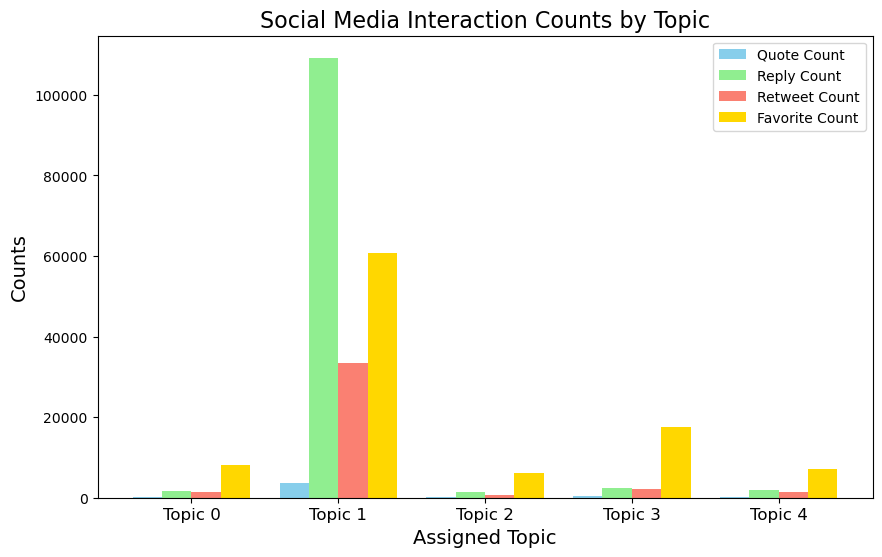

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# data
data = {
    'Assigned_Topic': [0, 1, 2, 3, 4],
    'quote_count': [186, 3601, 220, 536, 179],
    'reply_count': [1771, 109224, 1326, 2353, 1967],
    'retweet_count': [1298, 33450, 681, 2223, 1512],
    'favorite_count': [8111, 60758, 6131, 17546, 7196]
}

df = pd.DataFrame(data)
df.set_index('Assigned_Topic', inplace=True)

# size and width
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.2  

# color
colors = ['skyblue', 'lightgreen', 'salmon', 'gold']

# draw the chart
ax.bar(df.index - width*1.5, df['quote_count'], width, label='Quote Count', color=colors[0])
ax.bar(df.index - width/2, df['reply_count'], width, label='Reply Count', color=colors[1])
ax.bar(df.index + width/2, df['retweet_count'], width, label='Retweet Count', color=colors[2])
ax.bar(df.index + width*1.5, df['favorite_count'], width, label='Favorite Count', color=colors[3])

# label
ax.set_xlabel('Assigned Topic', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.set_title('Social Media Interaction Counts by Topic', fontsize=16)
ax.set_xticks(df.index)
ax.set_xticklabels(['Topic 0', 'Topic 1', 'Topic 2', 'Topic 3', 'Topic 4'], fontsize=12)
ax.legend()

# plot show
plt.show()


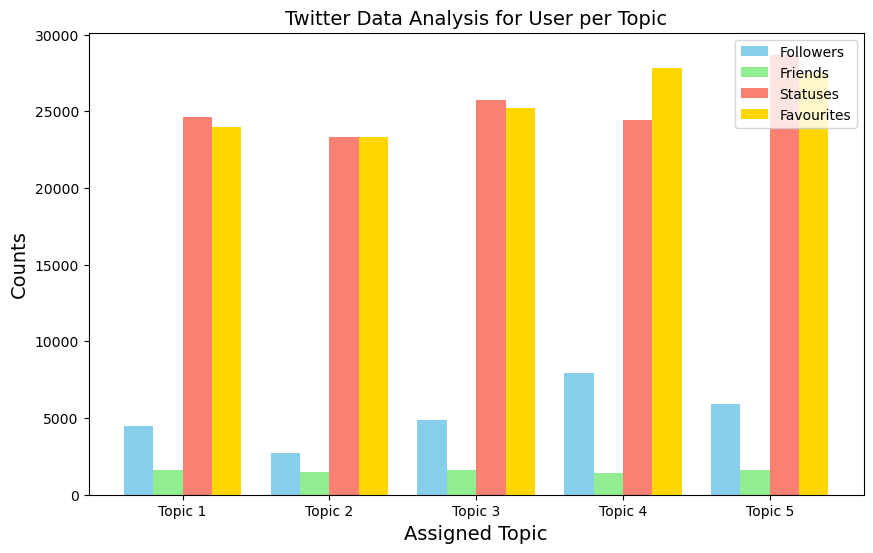

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a DataFrame from the provided data
data = {
    "Assigned_Topic": [1, 2, 3, 4, 5],
    "followers_count": [4472.504963, 2724.940074, 4861.428414, 7940.569109, 5903.462687],
    "friends_count": [1639.453296, 1486.494899, 1643.951175, 1433.601149, 1633.136300],
    "statuses_count": [24641.046577, 23347.662630, 25735.614537, 24433.962787, 28691.485779],
    "favourites_count": [23999.011199, 23318.953811, 25243.389134, 27796.566954, 27484.148127]
}
df = pd.DataFrame(data)

# Creating a plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting data
topics = df['Assigned_Topic']
width = 0.2  # Width of the bars
colors = ['skyblue', 'lightgreen', 'salmon', 'gold']  # Custom colors for the bars

ax.bar(topics - width*1.5, df['followers_count'], width, label='Followers', color=colors[0])
ax.bar(topics - width/2, df['friends_count'], width, label='Friends', color=colors[1])
ax.bar(topics + width/2, df['statuses_count'], width, label='Statuses', color=colors[2])
ax.bar(topics + width*1.5, df['favourites_count'], width, label='Favourites', color=colors[3])

# Adding labels and title
ax.set_xlabel('Assigned Topic',fontsize=14)
ax.set_ylabel('Counts',fontsize=14)
ax.set_title('Twitter Data Analysis for User per Topic',fontsize=14
)
ax.set_xticks(topics)
ax.set_xticklabels(['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5'])
ax.legend()

# Show plot
plt.show()


# Description WordCloud

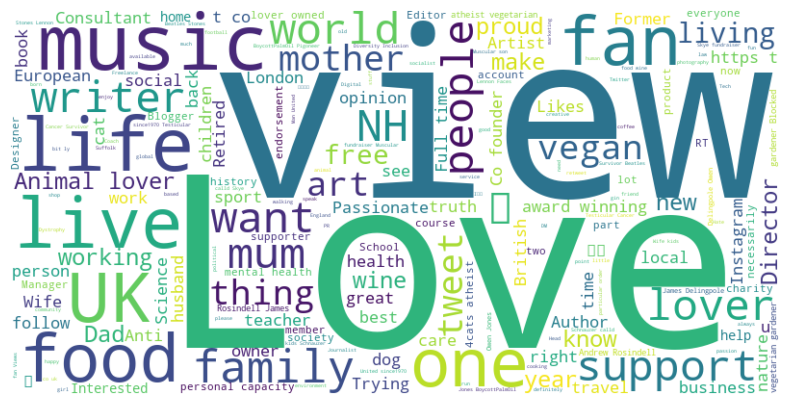

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import pandas as pd

# Load the CSV file to examine its structure and content
file_path = 'text classification.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe and its columns
data.head(), data.columns

# Filter data where Assigned_Topic is 0
topic_0_data = data[data['Assigned_Topic'] == 0]

# Group by 'final_text' and extract unique descriptions for each group
descriptions_by_final_text = topic_0_data.groupby('final_text')['description'].unique()

# Convert the result into a more readable format and display
descriptions_by_final_text_df = descriptions_by_final_text.reset_index()
descriptions_by_final_text_df

# Extract all descriptions for topic 0 and concatenate them into a single text
descriptions_text = " ".join(topic_0_data['description'].dropna().values)

# Generate a word cloud for visual inspection of common words
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(descriptions_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


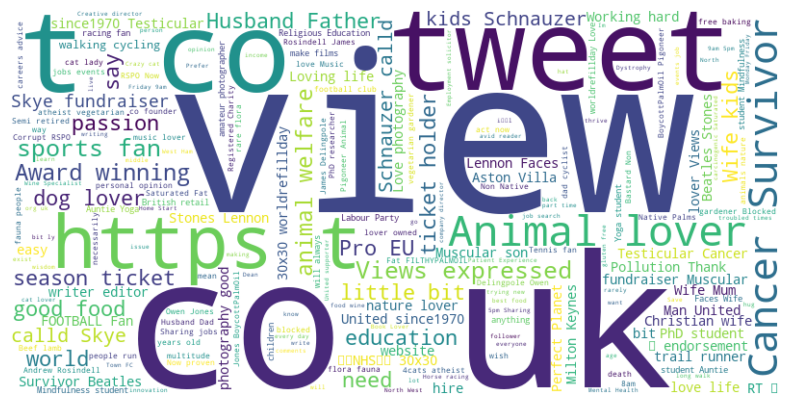

In [43]:
# Filter data where Assigned_Topic is 1
topic_1_data = data[data['Assigned_Topic'] == 1]

# Extract all descriptions for topic 1 and concatenate them into a single text
descriptions_topic_1_text = " ".join(topic_1_data['description'].dropna().values)

# Generate a word cloud for visual inspection of common words in topic 1 descriptions
wordcloud_topic_1 = WordCloud(width = 800, height = 400, background_color ='white').generate(descriptions_topic_1_text)

# Display the word cloud for topic 1 descriptions
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_topic_1, interpolation='bilinear')
plt.axis("off")
plt.show()


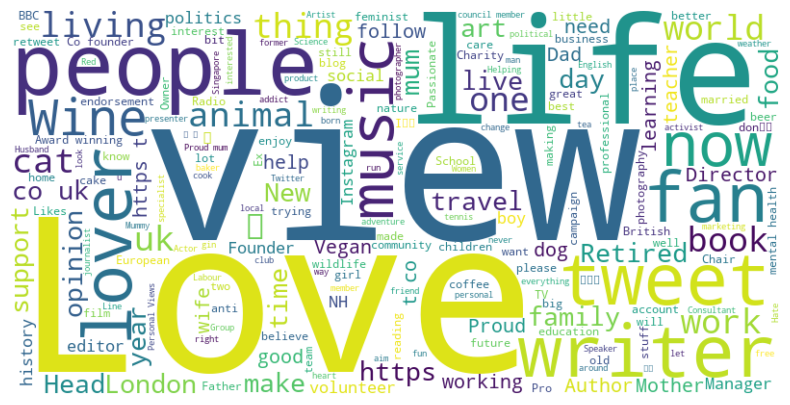

In [34]:
# Filter data where Assigned_Topic is 2
topic_2_data = data[data['Assigned_Topic'] == 2]

# Extract all descriptions for topic 2 and concatenate them into a single text
descriptions_topic_2_text = " ".join(topic_2_data['description'].dropna().values)

# Generate a word cloud for visual inspection of common words in topic 2 descriptions
wordcloud_topic_2 = WordCloud(width = 800, height = 400, background_color ='white').generate(descriptions_topic_2_text)

# Display the word cloud for topic 2 descriptions
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_topic_2, interpolation='bilinear')
plt.axis("off")
plt.show()


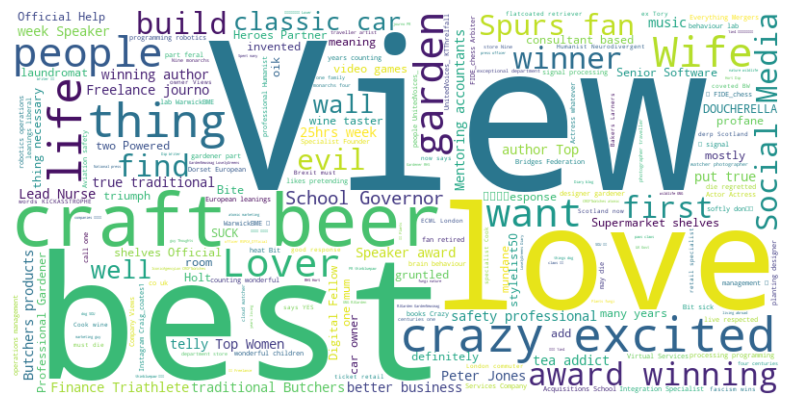

In [35]:
# Filter data where Assigned_Topic is 3
topic_3_data = data[data['Assigned_Topic'] == 3]

# Extract all descriptions for topic 3 and concatenate them into a single text
descriptions_topic_3_text = " ".join(topic_3_data['description'].dropna().values)

# Generate a word cloud for visual inspection of common words in topic 3 descriptions
wordcloud_topic_3 = WordCloud(width = 800, height = 400, background_color ='white').generate(descriptions_topic_3_text)

# Display the word cloud for topic 3 descriptions
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_topic_3, interpolation='bilinear')
plt.axis("off")
plt.show()


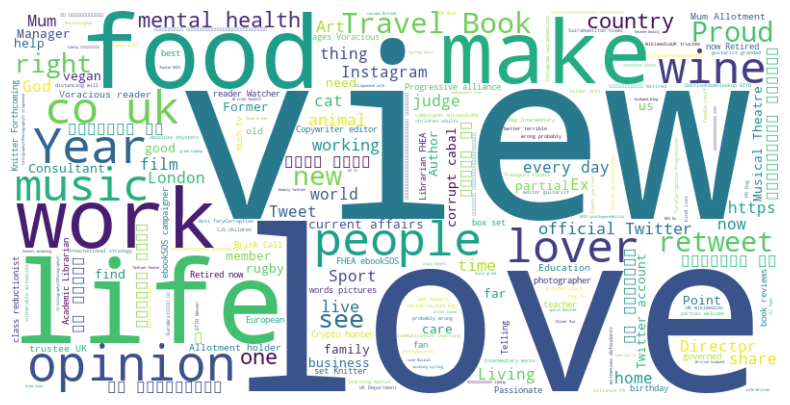

In [36]:
# Filter data where Assigned_Topic is 4
topic_4_data = data[data['Assigned_Topic'] == 4]

# Extract all descriptions for topic 4 and concatenate them into a single text
descriptions_topic_4_text = " ".join(topic_4_data['description'].dropna().values)

# Generate a word cloud for visual inspection of common words in topic 4 descriptions
wordcloud_topic_4 = WordCloud(width = 800, height = 400, background_color ='white').generate(descriptions_topic_4_text)

# Display the word cloud for topic 4 descriptions
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_topic_4, interpolation='bilinear')
plt.axis("off")
plt.show()


# Sentiment Analysis

In [26]:
import pandas as pd

# Load the uploaded CSV file
file_path = 'merged_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure and content
data.head()


,id_file1,screen_name,followers_count,friends_count,favourites_count,statuses_count,created_at_file1,location,derived_locations,description,...,time_zone,lang,original_id,final_text,id_file2,created_at_file2,quote_count,reply_count,retweet_count,favorite_count
0,352659664,Nima_Suchak,1510,2632,26774,6451,Wed Aug 10 22:47:36 +0000 2011,Leicester/London,"[{'country': 'United Kingdom', 'country_code':...",Journalist & editor usually found in coffee sh...,...,NaN,NaN,1328737494000000000,go toobut ill definit shop,1328737494000000000,2020-11-17 16:31:19,0,0,0,1
1,709674618311860224,KaterRhodes,152,309,764,379,Tue Mar 15 09:36:28 +0000 2016,"Cambridge, England","[{'country': 'United Kingdom', 'country_code':...",Account Executive with a passion for the Insur...,...,NaN,NaN,1233486785000000000,wine deliv yesterday made violent sick,1233486785000000000,2020-02-28 20:19:01,0,1,0,0
2,1239884713508167680,workforcemvmnt,213,367,337,558,Tue Mar 17 12:02:52 +0000 2020,NaN,NaN,NaN,...,NaN,NaN,1244588187000000000,supportadvic,1244588187000000000,2020-03-30 11:32:01,0,0,0,0
3,19922496,robmay70,18062,8685,43930,34245,Mon Feb 02 18:53:03 +0000 2009,United Kingdom,"[{'country': 'United Kingdom', 'country_code':...",猸曪笍 Cyber Security Speaker 猸?MD & Founder @ram...,...,NaN,NaN,1319360588000000000,NaN,1319360588000000000,2020-10-22 19:30:51,0,1,0,4
4,887033748495245312,CharlieRamsay8,44,193,2968,2416,Mon Jul 17 19:38:20 +0000 2017,"West Midlands, England","[{'country': 'United Kingdom', 'country_code':...",NaN,...,NaN,NaN,1289305039000000000,know man exempt visual clue ask,1289305039000000000,2020-07-31 21:00:50,0,2,0,0


In [27]:
from textblob import TextBlob

# Drop rows where 'final_text' is NaN
data_clean = data.dropna(subset=['final_text'])

# Function to apply sentiment analysis
def apply_sentiment(text):
    # Create a TextBlob object
    blob = TextBlob(text)
    # Return the sentiment polarity
    return blob.sentiment.polarity

# Apply sentiment analysis to the 'final_text' column
data_clean['sentiment_polarity'] = data_clean['final_text'].apply(apply_sentiment)

# Show a preview of the sentiments
data_clean[['final_text', 'sentiment_polarity']].head()


C:\Users\11111\AppData\Local\Temp\ipykernel_12764\4190017640.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['sentiment_polarity'] = data_clean['final_text'].apply(apply_sentiment)


,final_text,sentiment_polarity
0,go toobut ill definit shop,-0.500000
1,wine deliv yesterday made violent sick,-0.757143
2,supportadvic,0.000000
4,know man exempt visual clue ask,0.000000
5,let environ save togeth,0.000000


In [28]:
# Categorize sentiments into positive, negative, and neutral
data_clean['sentiment_category'] = data_clean['sentiment_polarity'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Calculate the percentage of each sentiment category
sentiment_distribution = data_clean['sentiment_category'].value_counts(normalize=True) * 100

sentiment_distribution


C:\Users\11111\AppData\Local\Temp\ipykernel_12764\3796373155.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['sentiment_category'] = data_clean['sentiment_polarity'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))


sentiment_category
neutral     61.593826
positive    29.197017
negative     9.209157
Name: proportion, dtype: float64

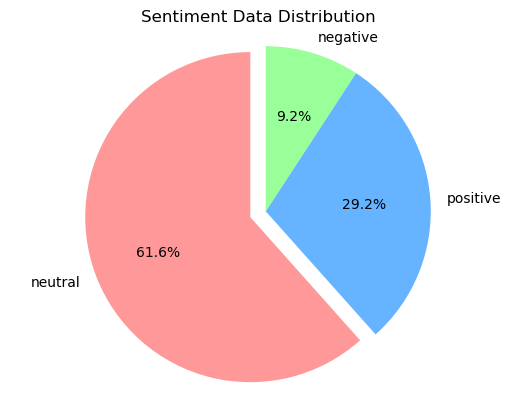

In [29]:
import matplotlib.pyplot as plt

# Create a pie chart for sentiment distribution
labels = sentiment_distribution.index
sizes = sentiment_distribution.values
colors = ['#ff9999','#66b3ff','#99ff99']
explode = (0.1, 0, 0)  # only "explode" the 1st slice (i.e. 'neutral')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Sentiment Data Distribution')
plt.show()


In [30]:

non_empty_final_texts_count = data['final_text'].dropna().shape[0]

print("in tital", non_empty_final_texts_count )


in tital 11532


C:\Users\11111\AppData\Local\Temp\ipykernel_12764\2768262320.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['sentiment'] = data_cleaned['final_text'].apply(get_sentiment)


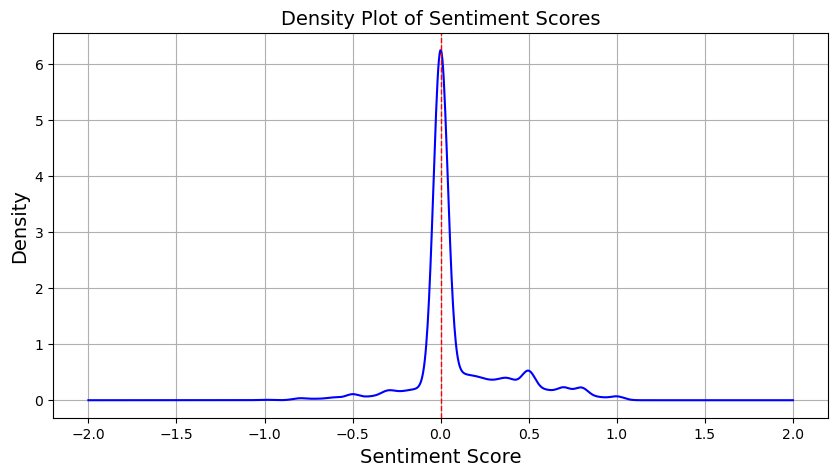

In [36]:
# Create a density plot for the sentiment values
from textblob import TextBlob

# Drop rows where 'final_text' is NaN
data_cleaned = data.dropna(subset=['final_text'])

# Define a function to apply sentiment analysis on the text
def get_sentiment(text):
    # Use TextBlob to get the sentiment polarity
    return TextBlob(text).sentiment.polarity

# Apply the sentiment analysis function to the 'final_text' column
data_cleaned['sentiment'] = data_cleaned['final_text'].apply(get_sentiment)

# Show the results of the sentiment analysis
data_cleaned[['final_text', 'sentiment']].head()

plt.figure(figsize=(10, 5))
data_cleaned['sentiment'].plot(kind='density', color='blue')
plt.title('Density Plot of Sentiment Scores', fontsize=14)
plt.xlabel('Sentiment Score', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True)
plt.axvline(0, color='red', linestyle='dashed', linewidth=1)  # Line to indicate neutral sentiment (0)
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


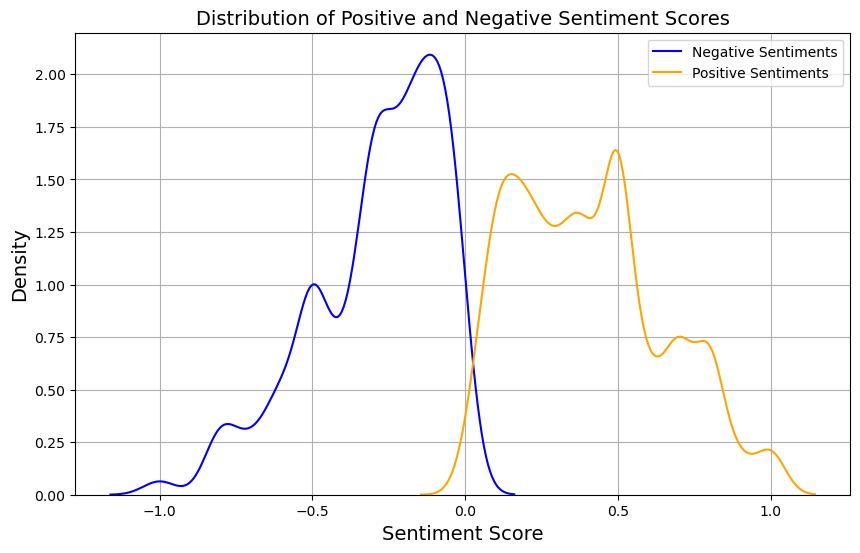

In [35]:
import seaborn as sns

# Separate positive and negative sentiments
positive_sentiments = data_cleaned[data_cleaned['sentiment'] > 0]['sentiment']
negative_sentiments = data_cleaned[data_cleaned['sentiment'] < 0]['sentiment']

# Create a density plot for positive and negative sentiments
plt.figure(figsize=(10, 6))
sns.kdeplot(negative_sentiments, color='blue', label='Negative Sentiments')
sns.kdeplot(positive_sentiments, color='orange', label='Positive Sentiments')

plt.title('Distribution of Positive and Negative Sentiment Scores', fontsize=14)
plt.xlabel('Sentiment Score', fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


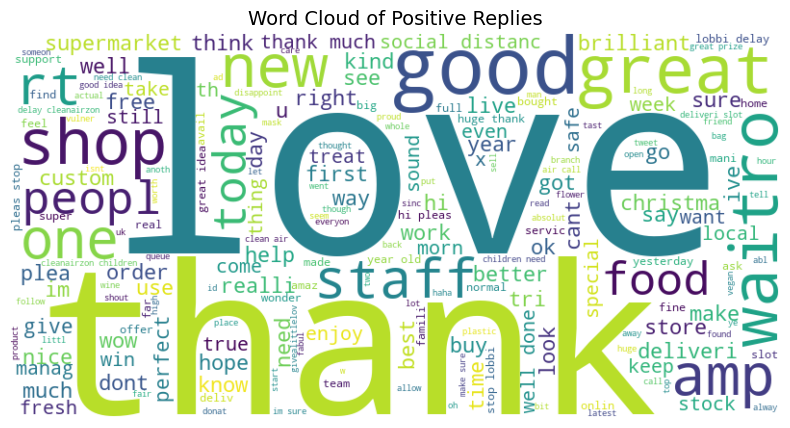

In [40]:
from wordcloud import WordCloud

# Extract positive sentiments texts
positive_texts = data_cleaned[data_cleaned['sentiment'] > 0]['final_text']

# Generate a word cloud for positive sentiments
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_texts))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Word Cloud of Positive Replies',fontsize=14)
plt.show()


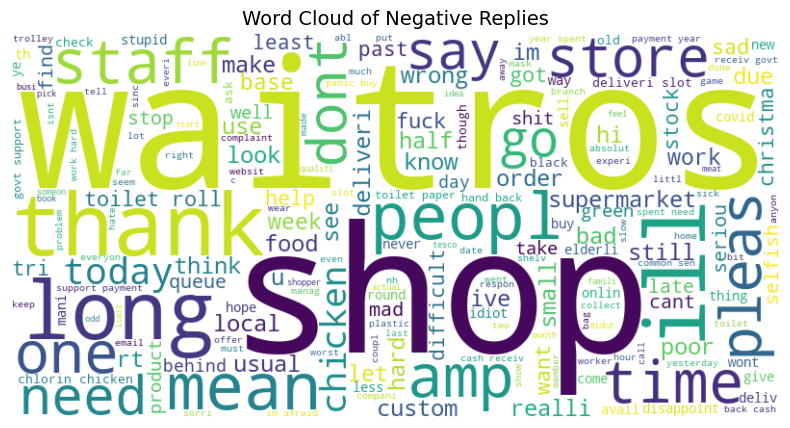

In [41]:
# Extract negative sentiments texts
negative_texts = data_cleaned[data_cleaned['sentiment'] < 0]['final_text']

# Generate a word cloud for negative sentiments
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_texts))

# Display the word cloud for negative sentiments
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Word Cloud of Negative Replies',fontsize=14)
plt.show()


#  Description LDA

In [61]:
import pandas as pd

# Load the data to see the first few rows and understand its structure
file_path = 'merged_data.csv'
data = pd.read_csv(file_path)



In [62]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

# Preprocessing and cleaning the descriptions
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

# Apply the cleaning function to the descriptions
data['cleaned_description'] = data['description'].dropna().apply(clean_text)

# Set up parameters for vectorization
no_features = 1000

# LDA can only use raw term counts because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(data['cleaned_description'].dropna())

# Define and fit the LDA model
no_topics = 5  # Number of topics
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50., random_state=0)
lda.fit(tf)

# Display the top words in the topics
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d" % (topic_idx)] = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
    return topic_dict

no_top_words = 10
topics = display_topics(lda, tf_vectorizer.get_feature_names_out(), no_top_words)
topics


{'Topic 0': ['love',
  'music',
  'fan',
  'world',
  'lover',
  'loves',
  'husband',
  'nature',
  'art',
  'just'],
 'Topic 1': ['time',
  'twitter',
  'european',
  'book',
  'learning',
  'animal',
  'news',
  'cancer',
  'lover',
  'education'],
 'Topic 2': ['views',
  'proud',
  'health',
  'london',
  'work',
  'nhs',
  'life',
  'live',
  'follow',
  'sheher'],
 'Topic 3': ['life',
  'views',
  'living',
  'people',
  'support',
  'wife',
  'like',
  'teacher',
  'mother',
  'best'],
 'Topic 4': ['food',
  'writer',
  'wine',
  'lover',
  'mum',
  'tweets',
  'love',
  'vegan',
  'travel',
  'good']}